In [1]:
from glob import glob

import matplotlib.pyplot as plt
import IPython as ipython
import numpy as np
import librosa
import librosa.display
import pandas as pd
import json

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

%matplotlib inline

In [3]:
PATH = "./data/nsynth-train/audio/{instrument}*.wav"

INSTRUMENT = "bass_acoustic_000"

N_FFT = 2048

In [4]:
files = glob(PATH.format(instrument=INSTRUMENT))
metadata = pd \
    .read_json('./data/nsynth-train/examples.json', orient='index') \
    .query('instrument_str == @INSTRUMENT')

In [5]:
def plot_wave(wave, sr, first_n_seconds=None, figsize=(20, 5)):
    plt.figure(figsize=figsize)
    if first_n_seconds:
        wave_to_plot = wave[:int(sr * first_n_seconds)]
    else:
        wave_to_plot = wave
    librosa.display.waveplot(wave_to_plot, sr=sr)
    
def plot_sliding_spectrum(S_abs):
    librosa.display.specshow(librosa.amplitude_to_db(S_abs, ref=np.max), y_axis='log', x_axis='time')

def plot_spectrum(freqs, S_summed):
    mask = np.where(S_summed >= 1)
    plt.figure(figsize=(20, 3))
    plt.bar(freqs[mask], S_summed[mask], width=50)
    
def get_sliding_spectrum(wave, n_fft):
    S = librosa.stft(wave, n_fft=n_fft)
    S_abs = np.abs(S)
    freqs = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    return freqs, S_abs

def get_spectrum(wave, n_fft):
    S = librosa.stft(wave, n_fft=n_fft)
    S_abs = np.abs(S)
    S_summed = S_abs.sum(axis=1)
    freqs = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    return freqs, S_summed

def reconstruct_from_sliding_spectrum(S_abs):
    return librosa.core.spectrum.griffinlim(S_abs)

def reconstruct_from_spectrum(S_summed, chunks=173):
    sliding_spectrum = np.column_stack([S_summed] * chunks).copy() / chunks
    return reconstruct_from_sliding_spectrum(sliding_spectrum)

In [6]:
file = files[0]
wave, sr = librosa.load(file)
ipython.display.Audio(wave, rate=sr)

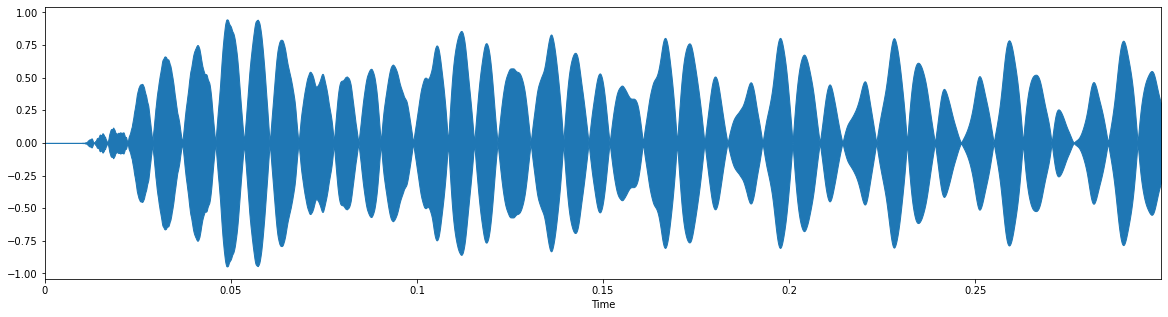

In [7]:
plot_wave(wave, sr, first_n_seconds=0.3)

C:\Users\Datlauworkz\.conda\envs\sound\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Datlauworkz\.conda\envs\sound\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Datlauworkz\.conda\envs\sound\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


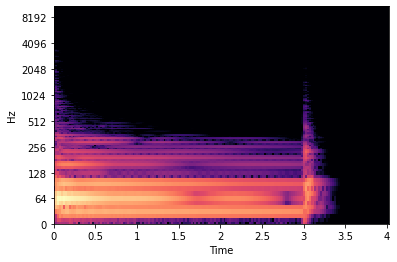

In [8]:
_, S_abs = get_sliding_spectrum(wave, N_FFT)
plot_sliding_spectrum(S_abs)
reconstructed_wave = reconstruct_from_sliding_spectrum(S_abs)
ipython.display.Audio(reconstructed_wave, rate=sr)

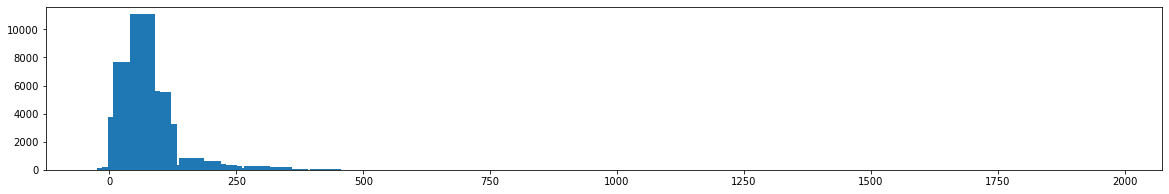

In [9]:
freqs, S_summed = get_spectrum(wave, N_FFT)
plot_spectrum(freqs, S_summed)
reconstructed_wave = reconstruct_from_spectrum(S_summed)
ipython.display.Audio(reconstructed_wave, rate=sr)

In [10]:
freqs[freqs < 250]

array([  0.        ,  10.76660156,  21.53320312,  32.29980469,
        43.06640625,  53.83300781,  64.59960938,  75.36621094,
        86.1328125 ,  96.89941406, 107.66601562, 118.43261719,
       129.19921875, 139.96582031, 150.73242188, 161.49902344,
       172.265625  , 183.03222656, 193.79882812, 204.56542969,
       215.33203125, 226.09863281, 236.86523438, 247.63183594])

In [20]:
metadata

,note,sample_rate,pitch,instrument_source,instrument_family_str,instrument_str,note_str,qualities_str,instrument_source_str,velocity,instrument_family,instrument,qualities
bass_acoustic_000-051-050,33979,16000,51,0,bass,bass_acoustic_000,bass_acoustic_000-051-050,[],acoustic,50,0,70,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
bass_acoustic_000-060-127,265202,16000,60,0,bass,bass_acoustic_000,bass_acoustic_000-060-127,[percussive],acoustic,127,0,70,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
bass_acoustic_000-037-050,202746,16000,37,0,bass,bass_acoustic_000,bass_acoustic_000-037-050,[dark],acoustic,50,0,70,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
bass_acoustic_000-027-025,220780,16000,27,0,bass,bass_acoustic_000,bass_acoustic_000-027-025,[dark],acoustic,25,0,70,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
bass_acoustic_000-049-025,215525,16000,49,0,bass,bass_acoustic_000,bass_acoustic_000-049-025,[],acoustic,25,0,70,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
bass_acoustic_000-054-075,245773,16000,54,0,bass,bass_acoustic_000,bass_acoustic_000-054-075,[],acoustic,75,0,70,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
bass_acoustic_000-042-050,254838,16000,42,0,bass,bass_acoustic_000,bass_acoustic_000-042-050,[dark],acoustic,50,0,70,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
bass_acoustic_000-062-100,190494,16000,62,0,bass,bass_acoustic_000,bass_acoustic_000-062-100,"[fast_decay, percussive]",acoustic,100,0,70,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]"
bass_acoustic_000-027-050,195798,16000,27,0,bass,bass_acoustic_000,bass_acoustic_000-027-050,[dark],acoustic,50,0,70,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"


<AxesSubplot:xlabel='pitch', ylabel='velocity'>

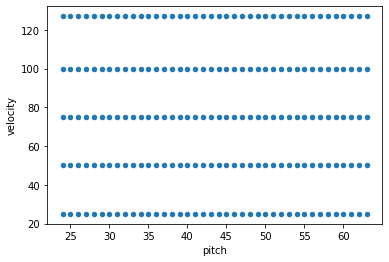

In [11]:
metadata.plot.scatter('pitch', 'velocity')

In [12]:
len(freqs)

1025

In [13]:
def load_spectrum_from_file(file_id):
    wave, sr = librosa.load(f"./data/nsynth-train/audio/{file_id}.wav")
    f, S = get_spectrum(wave, N_FFT)
    return S[f <= 250]
    
labels = [load_spectrum_from_file(x) for x in metadata.index]

In [14]:
def make_dataset(dataframe, labels):
    ds = tf.data.Dataset.from_tensor_slices((dataframe, labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

lables = np.stack(labels)
label_max = np.max(lables)
print(label_max)
lables = lables / label_max
dataframe = pd.get_dummies(metadata[['pitch', 'velocity']], columns=['pitch', 'velocity'], prefix=['pitch_', 'velocity_'])

ds_train = make_dataset(
    dataframe.iloc[:180],
    lables[:180]
) \
    .batch(32)

ds_test = make_dataset(
    dataframe.iloc[180:],
    lables[180:]
) \
    .batch(32)

21384.16


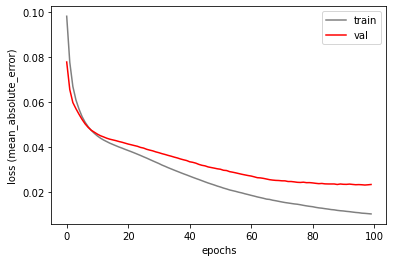

In [15]:
loss = 'mean_absolute_error'

model = Sequential()
model.add(Dense(64, input_dim=45, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(labels[0])))
model.compile(
    loss=loss,
    optimizer=tf.optimizers.Adam(),
    metrics=['mse']
)
h = model.fit(ds_train, epochs=100, batch_size=15, validation_data=ds_test, verbose=0)
plt.ylabel(f'loss ({loss})')
plt.xlabel('epochs')
plt.plot(h.history['loss'], label='train', c='gray')
plt.plot(h.history['val_loss'], label='val', c='red')
plt.legend()

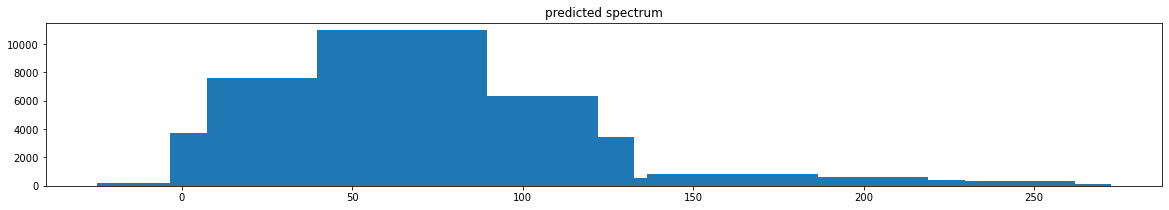

In [16]:
row = [1] + [0] * 39 + [1] + [0] * 4
prediction = model.predict([row])[0][:1025] * label_max
long_prediction = np.concatenate((prediction, np.zeros(len(freqs) - len(prediction))))
x = reconstruct_from_spectrum(long_prediction, N_FFT)
plot_spectrum(freqs, prediction)
plt.title('predicted spectrum')
ipython.display.Audio(x, rate=22050)

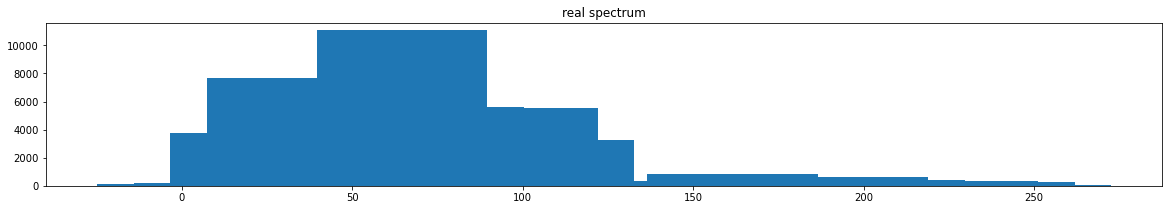

In [17]:
f, s = get_spectrum(wave, N_FFT)
plot_spectrum(f[f <= 250], s[f <= 250])
plt.title('real spectrum')
ipython.display.Audio(wave, rate=22050)

In [21]:
dataframe

,pitch__24,pitch__25,pitch__26,pitch__27,pitch__28,pitch__29,pitch__30,pitch__31,pitch__32,pitch__33,...,pitch__59,pitch__60,pitch__61,pitch__62,pitch__63,velocity__25,velocity__50,velocity__75,velocity__100,velocity__127
bass_acoustic_000-051-050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
bass_acoustic_000-060-127,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
bass_acoustic_000-037-050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
bass_acoustic_000-027-025,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
bass_acoustic_000-049-025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bass_acoustic_000-054-075,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
bass_acoustic_000-042-050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
bass_acoustic_000-062-100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
bass_acoustic_000-027-050,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
np.zeros(1025 - len(prediction))

array([0., 0., 0., ..., 0., 0., 0.])

<AxesSubplot:>

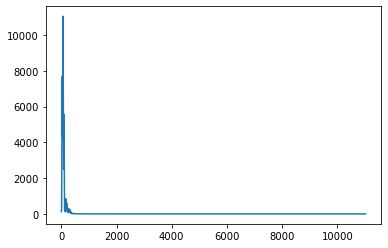

In [34]:
pd.Series(s, f).plot()